In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing latest data frame
#create a path
path = r'C:\Users\haari\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
#importing the pickle file
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Processed Data', 'ords_prods_cust_merge.pkl'))

In [4]:
#check the output
ords_prods_cust_merge.shape

(32435059, 32)

In [5]:
pd.set_option('display.max_columns', None)
ords_prods_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,Avg_amt_spent,spending_flag,frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#step 2: followed instruction from the exercise to create a bar chart, histogram,
#scatterplot and a line chart using a sample subset for the line chart


<AxesSubplot:ylabel='Frequency'>

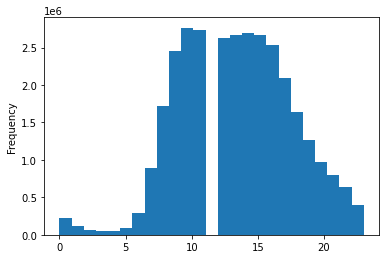

In [8]:
#step 3: create histogram of the 'order_hour_of_day' column
ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 25)

Text(0, 0.5, 'Frequency of orders (millions)')

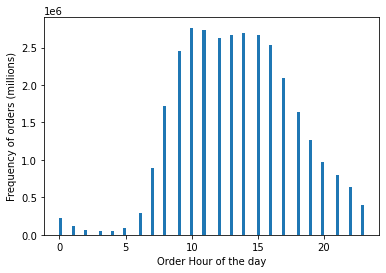

In [9]:
#creating the histogram again with increased number of bins
hist_order_hour_of_day = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 100)
plt.xlabel('Order Hour of the day')
plt.ylabel('Frequency of orders (millions)')

From the above histogram we can see that the busiest hour is at 10am and most of the orders come from 9am to 4pm. 
We can see a decline in the orders from 5pm onwards.
The slowest hours are the early morning hours.

In [10]:
#exporting the above histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

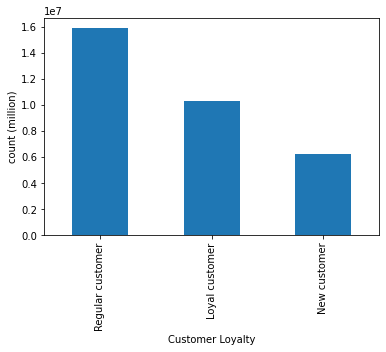

In [11]:
#step 4: Create a bar chart from the 'loyalty_flag' column
bar_loyalty_flag = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(xlabel = 'Customer Loyalty', ylabel = 'count (million)')

From the above bar chart we can see that among all the customers, there are more Regular customers than the loyal and new 
customers. Compared to the other two categories, new customers are in lower numbers

In [15]:
#exporting the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [16]:
#step 5: create a line chart using a sample of data on 'prices' and 'order_hour_of_day'
#sampling data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [17]:
#creating big(70%) sample data frame
big = ords_prods_cust_merge[dev]

In [18]:
#creating small(30%) sample data frame
small = ords_prods_cust_merge[~dev]

In [19]:
#checking the length of the data frames
len(ords_prods_cust_merge)

32435059

In [20]:
len(big) + len(small)

32435059

In [22]:
#creating a data fram with only two columns, prices and order_hour_of_day
df_2 = small [['prices', 'order_hour_of_day']]

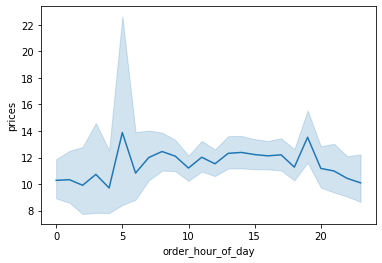

In [23]:
#creating a line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [24]:
#exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2.png'))

In [25]:
#step 6: create a line chart between age and number of dependants on the customer
#creating a data frame with the 2 columns
df_3 = small[['age', 'num_of_dependants']]

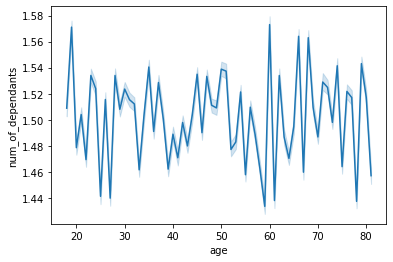

In [26]:
#creating a line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'num_of_dependants')

In [27]:
#from the above line chart, the line is all over the place suggesting that there is no connection between age 
#and number of dependants

In [28]:
#exporting the line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2.png'))

In [35]:
sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust_merge)

MemoryError: Unable to allocate 247. MiB for an array with shape (1, 32435059) and data type int64